## Etapas do projeto

<ol>
    <li>Título</li>
    <li>Breve descrição do problema</li>
    <li>Código de importação de bibliotecas;</li>
    <li>Código o download/carregamento/geração de dados;</li>
    <li>Etapa de exploração;</li>
    <li>Etapa de limpeza e transformação;</li>
    <li>Etapa de análise (com visualizações);</li>
    <li>Resumo dos insights gerados.</li>
</ol>


# Características que diferem o cliente inadimplente dos demais

# Descrição do problema

Neste projeto, tenho o objetivo de realizar uma análise exploratória de dados de limite de crédito ofertados pelo curso da EBAC. Para incrementar a entrega e facilitar a replicabilidade do material, os dados na íntegra foram disponibilizados neste [link](https://www.kaggle.com/datasets/pedropaulohonorato/basic-credit-data/data).

O dados simulam informações de clientes de um banco e traz informações demográficas, econômicas e de comportamento, como por exemplo a inadimplência. **Sabendo disso, o foco da análise será verificar quais as características diferem o bom do mau pagador.**

| Coluna  | Descrição |
| ------- | --------- |
| id      | Número da conta bancária |
| default | Indica se o cliente é inadimplente (1) ou não (0) |
| idade   | Idade do cliente (26 a 73 anos) |
| sexo    | F ou M |
| depedentes | 0 a 5 |
| escolaridade | Sem educação formal, ensino médio, graduação, mestrado ou doutorado |
| estado_civil | Solteiro, casado ou divorciado |
| salario_anual | Faixa do salário mensal multiplicado por 12 |
| tipo_cartao | Categoria do cartão. Blue, silver, gold ou platinum |
| meses_de_relacionamento | Quantidade de meses desde a abertura da conta |
| qtd_produtos | Quantidade de produtos contratados |
| iteracoes_12m | Quantidade de iterações com o cliente no último ano |
| meses_inativo_12m | Quantidade de meses que o cliente ficou inativo no último ano |
| limite_credito | Valor do limite do cartão de crédito |
| valor_transacoes_12m | Soma total do valor das transações no cartão de crédito no último ano |
| qtd_transacoes_12m | Quantidade total de transações no cartão de crédito no último ano |

# Código de importação de bibliotecas

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Código o download/carregamento/geração de dados

In [3]:
df = pd.read_csv('credit_data.csv', sep=',')
df.head()

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,na,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28


# Etapa de exploração

In [4]:
# Total de linhas e colunas do df
linha, coluna = df.shape

# Percentual de inadimplentes
df_inadimplentes = df.default.value_counts().reset_index()
inadimplentes = round((df_inadimplentes.iloc[1,1] / df_inadimplentes['count'].sum()) *100,0)

# Prints que auxiliam na análise da base
print(f"Linhas e colunas do Dataset: {linha} linhas e {coluna} colunas")
print(f"Pecentual de inadimplentes da base: {inadimplentes:.0f}%")
df.describe()

Linhas e colunas do Dataset: 10127 linhas e 16 colunas
Pecentual de inadimplentes da base: 16%


,id,default,idade,dependentes,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,qtd_transacoes_12m
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,0.160660,46.325960,2.346203,35.928409,3.812580,2.455317,2.341167,64.858695
std,3.690378e+07,0.367235,8.016814,1.298908,7.986416,1.554408,1.106225,1.010622,23.472570
min,7.080821e+08,0.000000,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,10.000000
25%,7.130368e+08,0.000000,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,45.000000
50%,7.179264e+08,0.000000,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,67.000000
75%,7.731435e+08,0.000000,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,81.000000
max,8.283431e+08,1.000000,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,139.000000


Existem valores nulos, mas na base estão como 'na' em string. Precisamos decidir o que fazer com esses dados.

In [5]:
def pct_na_in_columns(data):
    for idx in data.columns:
        if (data[idx][data[idx] == 'na'].count()>0):
            res = round((data[idx][data[idx] == 'na'].count() / data[idx].count())*100,0)
            print(f"Coluna {idx} e percentual de na {res:.0f}%")

# Percentual de valores na em cada coluna do dataset
pct_na_in_columns(df)   

Coluna escolaridade e percentual de na 15%
Coluna estado_civil e percentual de na 7%
Coluna salario_anual e percentual de na 11%


In [6]:
# Descrição de variáveis categóricas:

df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,10127,6,mestrado,3128
estado_civil,10127,4,casado,4687
salario_anual,10127,6,menos que $40K,3561
tipo_cartao,10127,4,blue,9436
limite_credito,10127,9272,"1.438,21",11
valor_transacoes_12m,10127,10035,"3.851,51",3


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       10127 non-null  int64 
 1   default                  10127 non-null  int64 
 2   idade                    10127 non-null  int64 
 3   sexo                     10127 non-null  object
 4   dependentes              10127 non-null  int64 
 5   escolaridade             10127 non-null  object
 6   estado_civil             10127 non-null  object
 7   salario_anual            10127 non-null  object
 8   tipo_cartao              10127 non-null  object
 9   meses_de_relacionamento  10127 non-null  int64 
 10  qtd_produtos             10127 non-null  int64 
 11  iteracoes_12m            10127 non-null  int64 
 12  meses_inativo_12m        10127 non-null  int64 
 13  limite_credito           10127 non-null  object
 14  valor_transacoes_12m     10127 non-nul

# Etapa de limpeza e transformação

Caso dropassemmos as linhas com valores nulos perderíamso cerca de 30% do dataset, o que torna essa ação inviável caso fossemos trabalhar com modelos preditivos. No entanto, como nossa intenção é uma análise mais simples, iremos dropar as linhas com valores nulos e trabalhar com o dataset restante. Além disso, preencher os valores restantes com as categorias de maior frequência traria um enviesamento a base de dados e análises futuras.

In [8]:
# Dropando linhas nulas das 3 variáveis categóricas
df.loc[df['escolaridade']== 'na'] = np.nan
df.loc[df['estado_civil']== 'na'] = np.nan
df.loc[df['salario_anual']== 'na'] = np.nan
df.dropna(subset=['escolaridade', 'estado_civil', 'salario_anual'],axis=0, inplace=True)
linhas_, colunas_ = df.shape
print(f'Linhas: {linhas_} \nColunas: {colunas_}')

Linhas: 7081 
Colunas: 16


In [9]:
replacing = lambda linha: float(linha.replace('.', '').replace(',', '.'))
for cols in ['limite_credito', 'valor_transacoes_12m']:
    df[cols] = df[cols].apply(replacing)

# Verificando se a coluna foi ajustada para float
df['limite_credito'].head()

0    12691.51
1     8256.96
2     3418.56
4     4716.22
5     4010.69
Name: limite_credito, dtype: float64

# Etapa de análise (com visualizações)

In [10]:
df_num = df.select_dtypes('number')
df_cat = df.select_dtypes('object')

<Axes: >

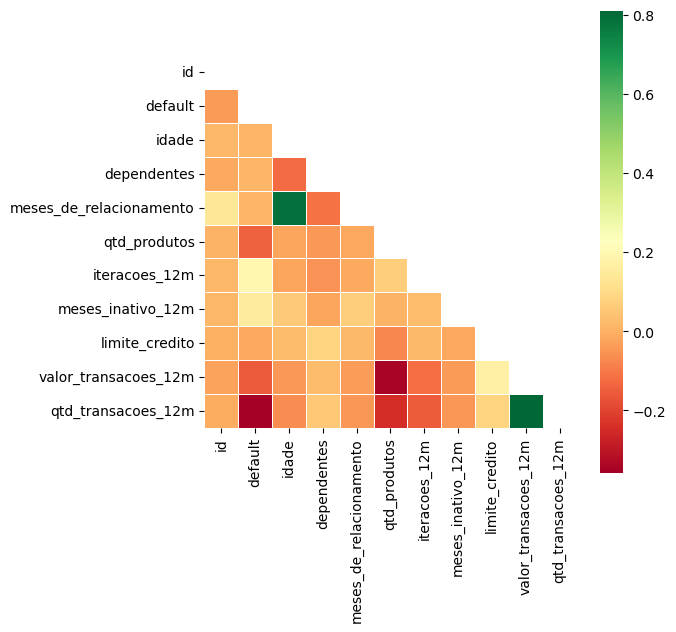

In [12]:
plt.figure(figsize=(6,6))
mask = np.triu(np.ones_like(df_num.corr(), dtype=np.bool_))
sns.heatmap(df_num.corr(), cmap="RdYlGn", square=True, mask=mask, linewidth=.5)

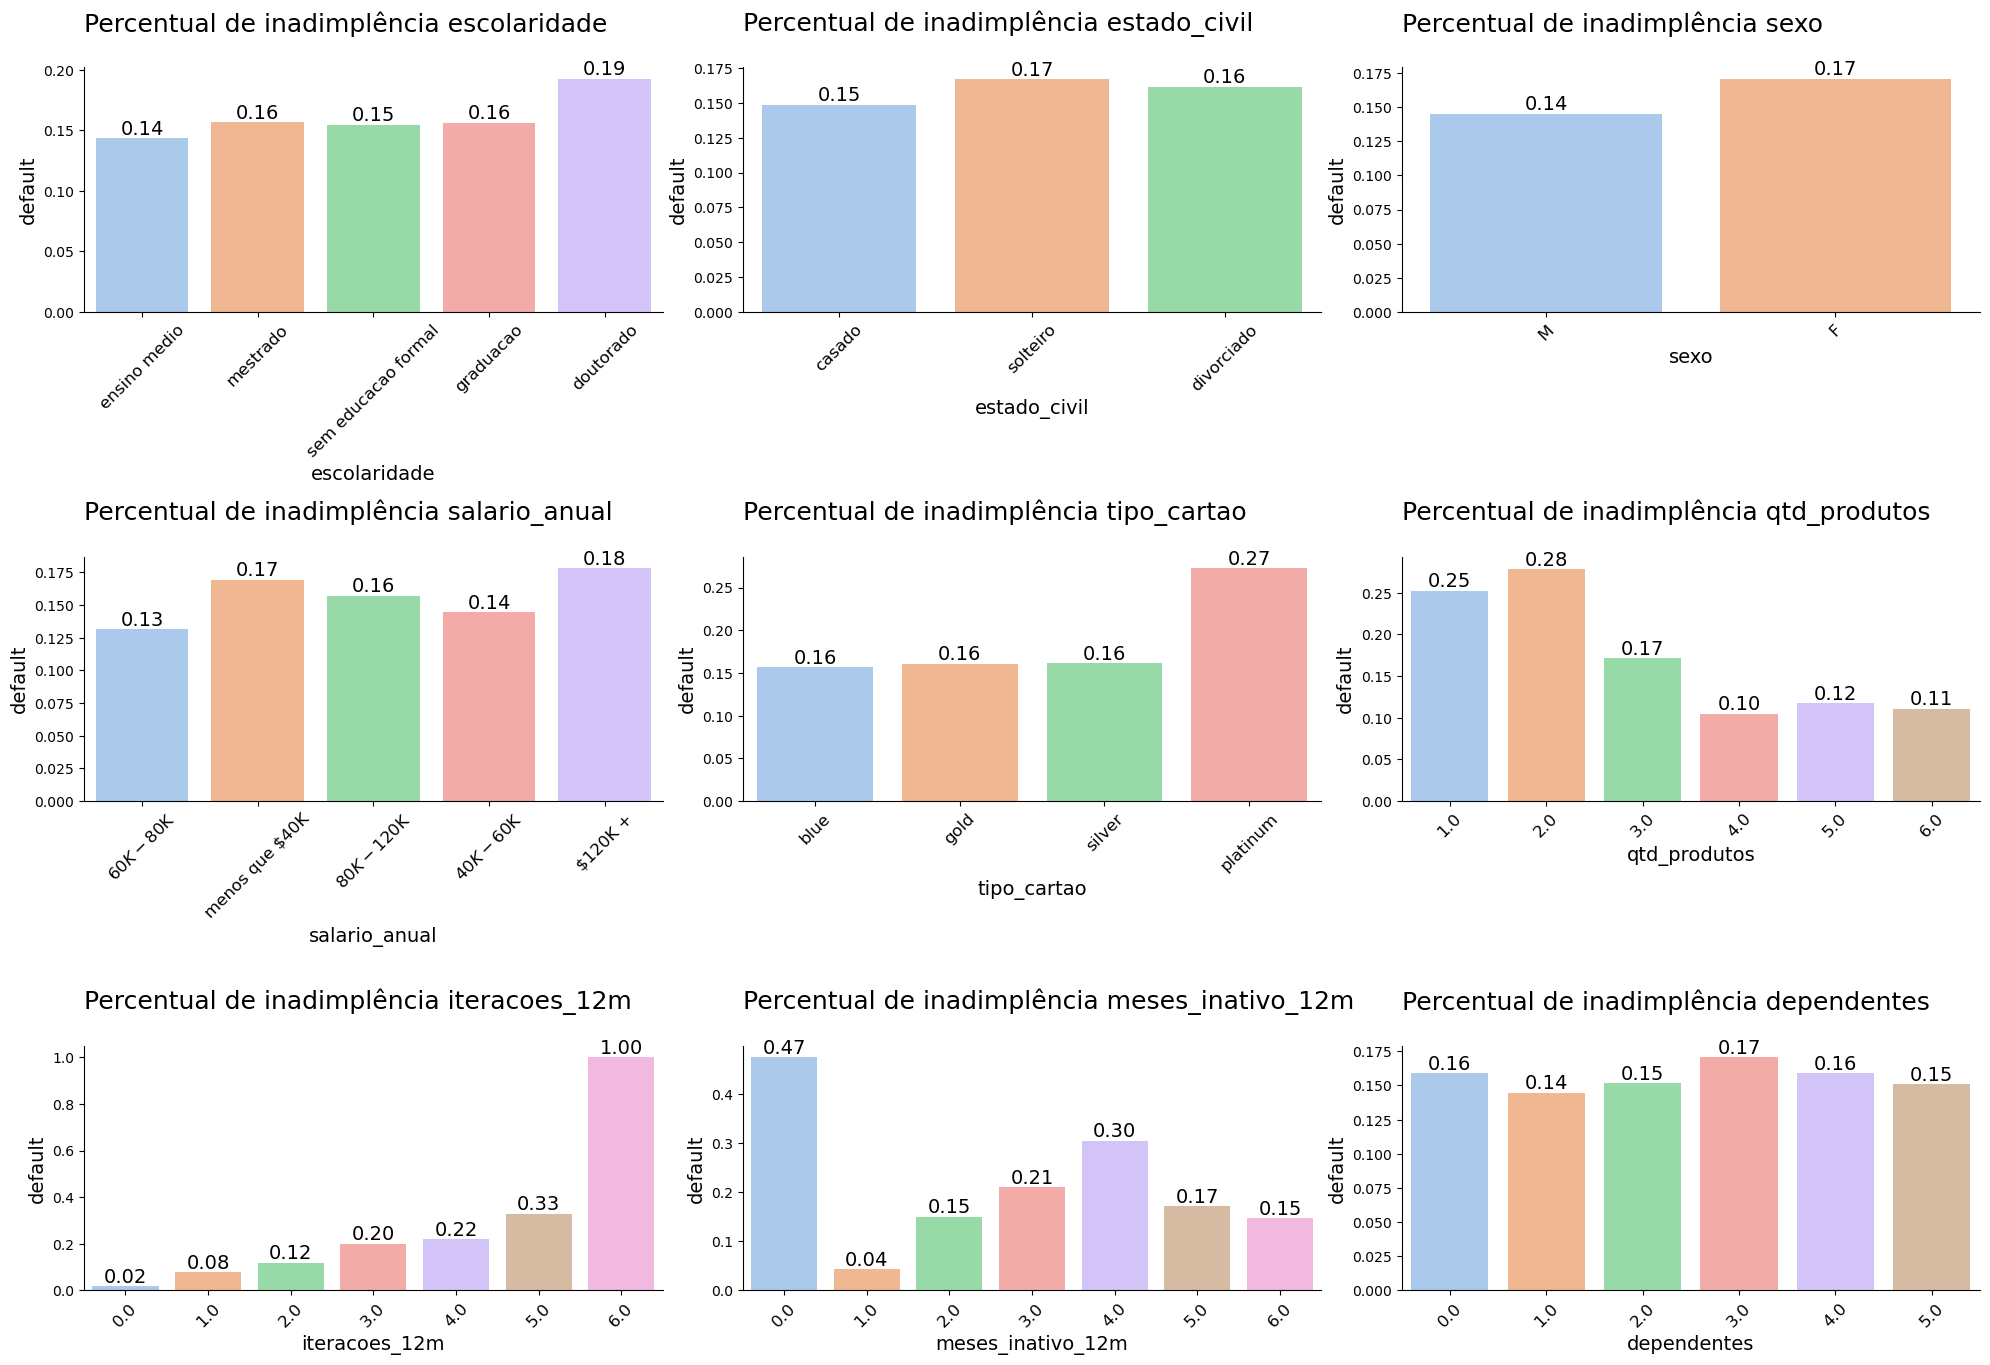

In [13]:
# Plotting categoric features
plt.figure(figsize=(20, 18))

columns = ['escolaridade','estado_civil',
           'sexo', 'salario_anual','tipo_cartao', 
           'qtd_produtos', 'iteracoes_12m', 
           'meses_inativo_12m', 'dependentes']

for i, col in enumerate(columns):
    ax = plt.subplot(4, 3, i+1)
    ax = sns.barplot(data=df, x=col, y='default', palette='pastel', errorbar=('ci', False))
    ax.bar_label(ax.containers[0], fmt='%.2f', fontsize=14)
    ax.set_xlabel(col, fontsize=14)
    ax.set_ylabel('default', fontsize=14)
    plt.xticks(size=12,rotation=45)
    plt.title(f'Percentual de inadimplência {col}\n', loc='left', fontsize=18)
    sns.despine()
plt.tight_layout()

**Perfil do cliente mais inadimplente**
<ol>
    <li>Mulheres</li>
    <li>Solteiro</li>
    <li>Douturado</li>
    <li>Renda de até 40k ou >= 120k</li>
    <li>Cartão Platinum</li>
    <li>3 dependentes</li>
    <li>2 produtos comprados</li>
    <li>0 ou 1 mês inativo</li>
    <li>Quanto maior o número de interação maior o percentual de inadimplência</li>
</ol>

O valor da inadimplência é maior quando o salario anual do cliente está abaixo de 40 mil ou acima de 120 mil

## Groupby - Características dos clientes inadimplentes

In [14]:
# Outra visão do perfil do cliente inadimplente
defaulter_profile = df[['limite_credito', 
        'valor_transacoes_12m', 'meses_inativo_12m', 'default', 'meses_de_relacionamento', 'qtd_produtos']].groupby('default').mean().reset_index()
defaulter_profile

,default,limite_credito,valor_transacoes_12m,meses_inativo_12m,meses_de_relacionamento,qtd_produtos
0,0.0,8555.587349,4635.007929,2.276977,35.949397,3.916555
1,1.0,8159.052462,3106.789057,2.694519,36.152740,3.298293


## Relação entre o valor gasto e a quantidade de transações por inadimplência no último ano

Sendo default = 1 o cliente inadimplente.

<Figure size 1000x600 with 0 Axes>

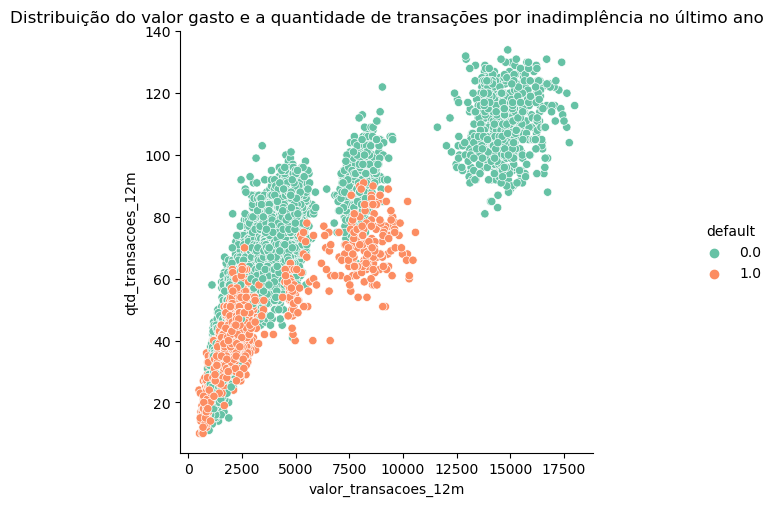

In [17]:
ax = plt.figure(figsize=(10,6), dpi=100)

ax = sns.relplot(df, x='valor_transacoes_12m', y='qtd_transacoes_12m', hue='default', palette='Set2', legend='full')
plt.title('Distribuição do valor gasto e a quantidade de transações por inadimplência no último ano')
plt.show(ax)

# Resumo dos insights gerados

Analisamos todas as variáveis do dataframe correlacionando a inadimplência com as demais informações. Feito isso, algumas conclusões podem ser extraídas:

<ol>
    <li>A taxa de inadimplência da base total é de 16%, o que é alto se comparada a <a href="https://valor.globo.com/financas/noticia/2024/02/06/juro-medio-das-operacoes-de-credito-cai-07-ponto-a-284percent-em-dezembro-mostra-bc.ghtml"> taxa média dos bancos brasileiros</a> (3%);</li>
    <li>A inadimplência não parece ter forte correlação com nenhuma variável do dataset, existem apenas fracas correlações;</li>
    <li>Alguns grupos se destacaram por ter uma taxa de inadimplência mais elevada: clientes com instrução 'Doutorado', 'menos que 40k' ou '120k +', cartão 'Platinum', 1 ou 2 produtos comprados, sem meses inativos;
    </li>
    <li>Apesar de algumas categorias apresentarem números mais elevados de inadimplência, olhando a média das categorias não foi possível verificar nenhuma discrepância significativa</li>
    <li>Por fim, cruzando o valor das transações e a quantidade notamos que os inadimplentes se concentram em valores menores e quantidade de transações menores</li>
</ol>

Em suma, tivemos alguns grupos de destaque e eles podem direcionar as próximas decisões da liderança sobre grupos de risco e ações para reduzir a inadimplência.